**INICIO**
> ANÁLISIS DE DATOS EN LA PREVENCIÓN DE ATAQUES DE PHISHING CON TÉCNICAS DE MINERÍA DE DATOS PARA EL ISTEL

**AUTOR**
> Edison Geovanny Cuñez Zaruma

**TUTORA**
>Lcda. María Elena Navarrete Vinces MSc.

**DATOS DEL DATASET**

SPAM DETECTION DATASET:
> [VER DATASET](https://huggingface.co/datasets/softecapps/spam_ham_spanish)


**ALGORITMO NAIVE BAYES**
> [VER PAPER](https://github.com/istel-edu/spam_detection/blob/main/algoritmos/Bayes%20and%20Naive-Bayes%20Classifier.pdf)


In [ ]:
import numpy as np
import pyarrow.parquet as pq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/istel-edu/spam_detection.git

In [ ]:
# Cargar los datasets
train_data = pq.read_table('/content/spam_detection/spanish_dataset/train.parquet').to_pandas()
test_data = pq.read_table('/content/spam_detection/spanish_dataset/test.parquet').to_pandas()


Información del dataset de entrenamiento:
Número total de elementos: 998
Cantidad de mensajes spam y no spam:
tipo
spam    521
ham     477
Name: count, dtype: int64
                                         mensaje  tipo
0    compra ahora y recibe un descuento especial   ham
1             haz clic aqui para ganar un premio  spam
2                    tu ordenador tiene un virus  spam
3          descubre como perder peso rapidamente  spam
4                   necesitas ayuda con tu tarea   ham
..                                           ...   ...
993       sorprende a tu pareja con este perfume  spam
994           resolveremos tu caso a la brevedad   ham
995      invierte en bienes raã­ces con expertos  spam
996         hola evaluemos tu perfil profesional   ham
997      ahorra en grande con nuestra cuenta vip  spam

[998 rows x 2 columns]


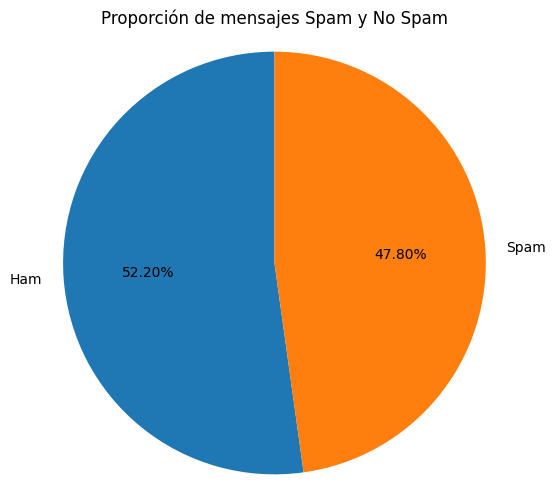

In [29]:
# Mostrar información sobre el dataset de entrenamiento
print("Información del dataset de entrenamiento:")
print("Número total de elementos:", len(train_data))
print("Cantidad de mensajes spam y no spam:")
print(train_data['tipo'].value_counts())
print(train_data)

# Gráfico de pastel de la proporción de mensajes spam y no spam
labels = ['Ham', 'Spam']
sizes = train_data['tipo'].value_counts()
colors = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de mensajes Spam y No Spam')
plt.show()

Información del dataset de prueba:
Número total de elementos: 209
Cantidad de mensajes spam y ham:
tipo
ham     109
spam    100
Name: count, dtype: int64
                                          mensaje  tipo
0             tu devolucion esta siendo procesada   ham
1         gana dinero por compartir tus opiniones  spam
2    recordatorio de tu cita con el nutricionista   ham
3       quema grasa abdominal con este suplemento  spam
4                      agradecemos tu preferencia   ham
..                                            ...   ...
204      tu nomina esta disponible para descargar   ham
205     baja 2 kilos por semana con nuestra dieta  spam
206                  elige entre debito o credito   ham
207             salva una vida donando sangre hoy   ham
208     no te pierdas las imagenes mas divertidas  spam

[209 rows x 2 columns]


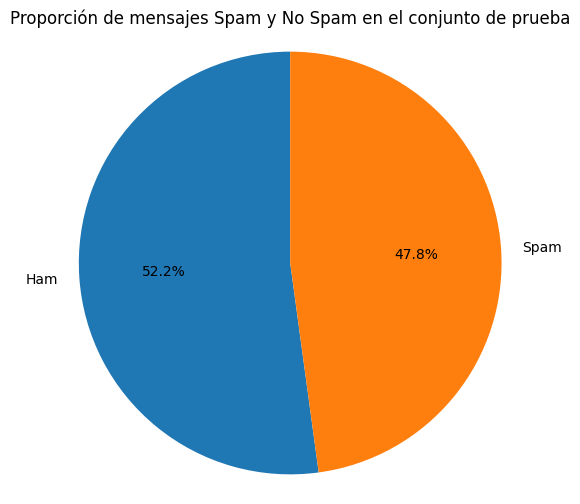

In [30]:
#Información sobre el dataset de prueba
print("Información del dataset de prueba:")
print("Número total de elementos:", len(test_data))
print("Cantidad de mensajes spam y ham:")
print(test_data['tipo'].value_counts())
print(test_data)

# Gráfico de la proporción de mensajes spam y no spam en el conjunto de prueba
labels_test = ['Ham', 'Spam']
sizes_test = test_data['tipo'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sizes_test, labels=labels_test, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de mensajes Spam y No Spam en el conjunto de prueba')
plt.show()

In [31]:
# Preprocesamiento de datos (Limpieza)
train_data['mensaje'] = train_data['mensaje'].str.lower()
train_data['mensaje'] = train_data['mensaje'].str.replace('[^a-zA-Z0-9\s]', '')
test_data['mensaje'] = test_data['mensaje'].str.lower()
test_data['mensaje'] = test_data['mensaje'].str.replace('[^a-zA-Z0-9\s]', '')

# Dividir los datos en características (X) y etiquetas (y)
X_train = train_data['mensaje']
y_train = train_data['tipo']
X_test = test_data['mensaje']
y_test = test_data['tipo']

# Convertir el texto en una matriz de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [32]:
# Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()

# Imprimir los parámetros del modelo antes del entrenamiento
print("Parámetros del modelo antes del entrenamiento:")
print(model.get_params())

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Imprimir los parámetros del modelo después del entrenamiento
print("\nParámetros del modelo después del entrenamiento:")
print(model.get_params())

# Obtener las probabilidades de clase del modelo entrenado
class_probabilities = model.predict_proba(X_train)
print("\nProbabilidades de clase del modelo entrenado:")
print(class_probabilities)

# Obtener los logaritmos de las probabilidades de las características del modelo entrenado
feature_log_probabilities = model.feature_log_prob_
print("\nLogaritmos de las probabilidades de las características del modelo entrenado:")
print(feature_log_probabilities)

# Obtener el número de características del modelo entrenado
num_features = model.n_features_in_
print("\nNúmero de características del modelo entrenado:", num_features)

# Obtener las clases del modelo entrenado
classes = model.classes_
print("Clases del modelo entrenado:", classes)

# Obtener el número de clases del modelo entrenado
num_classes = len(classes)
print("Número de clases del modelo entrenado:", num_classes)

print("\nModelo Naive Bayes entrenado exitosamente.")

Parámetros del modelo antes del entrenamiento:
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

Parámetros del modelo después del entrenamiento:
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

Probabilidades de clase del modelo entrenado:
[[5.75814924e-03 9.94241851e-01]
 [6.77800889e-05 9.99932220e-01]
 [5.09964227e-02 9.49003577e-01]
 ...
 [6.23595442e-05 9.99937640e-01]
 [9.93592384e-01 6.40761632e-03]
 [4.37852116e-03 9.95621479e-01]]

Logaritmos de las probabilidades de las características del modelo entrenado:
[[-7.75726498 -8.45041216 -8.45041216 ... -8.45041216 -8.45041216
  -7.35179987]
 [-7.84208237 -7.43661727 -7.43661727 ... -6.74347008 -7.43661727
  -8.53522955]]

Número de características del modelo entrenado: 1482
Clases del modelo entrenado: ['ham' 'spam']
Número de clases del modelo entrenado: 2

Modelo Naive Bayes entrenado exitosamente.


In [33]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

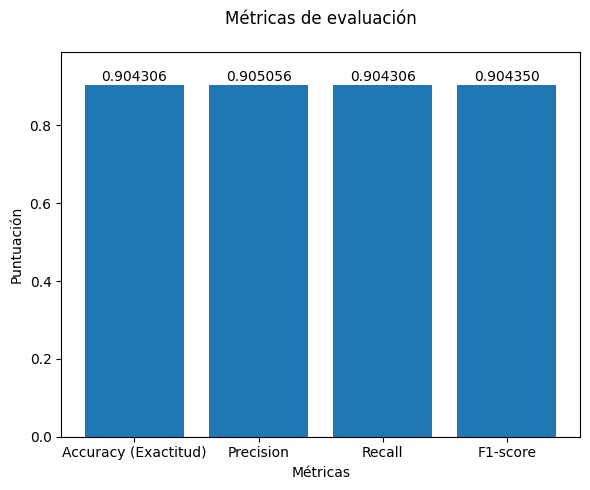


Métricas de evaluación:
1. Accuracy (Exactitud): 0.9043062200956937
   Representa la proporción de predicciones correctas del modelo.
   Se calcula como (Verdaderos Positivos + Verdaderos Negativos) / Total de muestras.
   Una accuracy alta indica que el modelo clasifica correctamente la mayoría de las muestras.

2. Precision (Precisión): 0.9050563471616103
   Representa la proporción de predicciones positivas correctas del modelo.
   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos).
   Una precision alta indica que cuando el modelo predice una clase positiva, es muy probable que sea correcta.

3. Recall (Exhaustividad): 0.9043062200956937
   Representa la proporción de muestras positivas reales que el modelo identifica correctamente.
   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos).
   Un recall alto indica que el modelo es capaz de identificar la mayoría de las muestras positivas.

4. F1-score (Puntuación F1): 0.9043

In [34]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear un gráfico de barras para visualizar las métricas
metrics = ['Accuracy (Exactitud)', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 5))
plt.bar(metrics, scores)
plt.ylim([0, 0.99])
plt.title('Métricas de evaluación', y=1.05)  # Ajustar la posición del título
plt.xlabel('Métricas')
plt.ylabel('Puntuación')

# Añadir los números redondeados a dos decimales en las columnas
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.6f}', ha='center')

plt.tight_layout()  # Ajustar el espaciado entre los elementos del gráfico
plt.show()


print("\nMétricas de evaluación:")
print("1. Accuracy (Exactitud):", accuracy)
print("   Representa la proporción de predicciones correctas del modelo.")
print("   Se calcula como (Verdaderos Positivos + Verdaderos Negativos) / Total de muestras.")
print("   Una accuracy alta indica que el modelo clasifica correctamente la mayoría de las muestras.")

print("\n2. Precision (Precisión):", precision)
print("   Representa la proporción de predicciones positivas correctas del modelo.")
print("   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos).")
print("   Una precision alta indica que cuando el modelo predice una clase positiva, es muy probable que sea correcta.")

print("\n3. Recall (Exhaustividad):", recall)
print("   Representa la proporción de muestras positivas reales que el modelo identifica correctamente.")
print("   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos).")
print("   Un recall alto indica que el modelo es capaz de identificar la mayoría de las muestras positivas.")

print("\n4. F1-score (Puntuación F1):", f1)
print("   Es una media armónica de la precision y el recall.")
print("   Se calcula como 2 * (Precision * Recall) / (Precision + Recall).")
print("   El F1-score es útil cuando se busca un equilibrio entre la precision y el recall.")
print("   Un F1-score alto indica que el modelo tiene un buen rendimiento tanto en precision como en recall.")

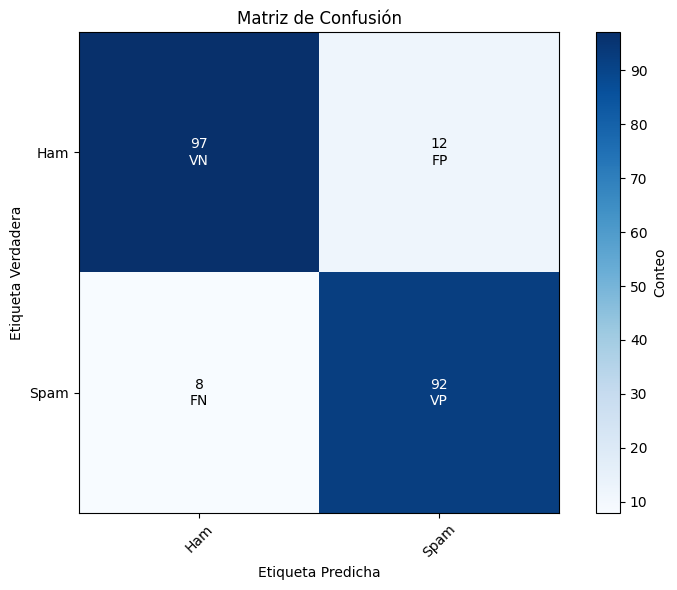

La matriz de confusión es una tabla que muestra el rendimiento de un modelo de clasificación.

Las celdas de la matriz de confusión representan:
- Verdaderos Positivos (VP): Instancias de spam correctamente clasificadas como spam.
- Falsos Positivos (FP): Instancias de no spam incorrectamente clasificadas como spam.
- Falsos Negativos (FN): Instancias de spam incorrectamente clasificadas como no spam.
- Verdaderos Negativos (VN): Instancias de no spam correctamente clasificadas como no spam.

Una matriz de confusión ideal tendría valores altos en la diagonal principal (VP y VN) y valores bajos fuera de ella (FP y FN).
Esto indicaría que el modelo clasifica correctamente la mayoría de las instancias de cada clase.


In [35]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar(label='Conteo')
classes = ['Ham', 'Spam']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label = f"{cm[i, j]}\nVN"
        elif i == 0 and j == 1:
            label = f"{cm[i, j]}\nFP"
        elif i == 1 and j == 0:
            label = f"{cm[i, j]}\nFN"
        else:
            label = f"{cm[i, j]}\nVP"

        plt.text(j, i, label, ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

print("La matriz de confusión es una tabla que muestra el rendimiento de un modelo de clasificación.")
print("\nLas celdas de la matriz de confusión representan:")
print("- Verdaderos Positivos (VP): Instancias de spam correctamente clasificadas como spam.")
print("- Falsos Positivos (FP): Instancias de no spam incorrectamente clasificadas como spam.")
print("- Falsos Negativos (FN): Instancias de spam incorrectamente clasificadas como no spam.")
print("- Verdaderos Negativos (VN): Instancias de no spam correctamente clasificadas como no spam.")
print("\nUna matriz de confusión ideal tendría valores altos en la diagonal principal (VP y VN) y valores bajos fuera de ella (FP y FN).")
print("Esto indicaría que el modelo clasifica correctamente la mayoría de las instancias de cada clase.")


In [36]:
# Ejemplo de predicción
email = ["Tu devolucion esta siendo procesada"]
email_features = vectorizer.transform(email)
prediction = model.predict(email_features)
print("El correo electrónico uno es:", prediction)

email = ["Descubre como perder peso rapidamente"]
email_features = vectorizer.transform(email)
prediction = model.predict(email_features)
print("El correo electrónico dos es:", prediction)


El correo electrónico uno es: ['ham']
El correo electrónico dos es: ['spam']
